In [122]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)

# Reflect Tables into SQLAlchemy ORM

# Exploratory Climate Analysis

In [101]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# determine scope of our query, which months are we looking for? 

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

#determine the date 12 months before that

last_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_date)

Year_prec_data = session.query(Measurement.date, Measurement.prcp).\
                            filter(Measurement.date > last_date).\
                            order_by(Measurement.date).all()
Year_prec_data
#Year_prec_data


('2017-08-23',)
2016-08-23


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [86]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_data_df = pd.DataFrame(Year_prec_data, columns=['DATE', 'RAIN'])
#rain_data_df.head()

rain_data_df = rain_data_df.dropna().set_index('DATE')
rain_data_df = rain_data_df.loc[rain_data_df["RAIN"]>0,:]
#rain_data_df

# Sort the dataframe by date
rain_data_df = rain_data_df.sort_values('DATE')
rain_data_df.head()

,RAIN
DATE,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


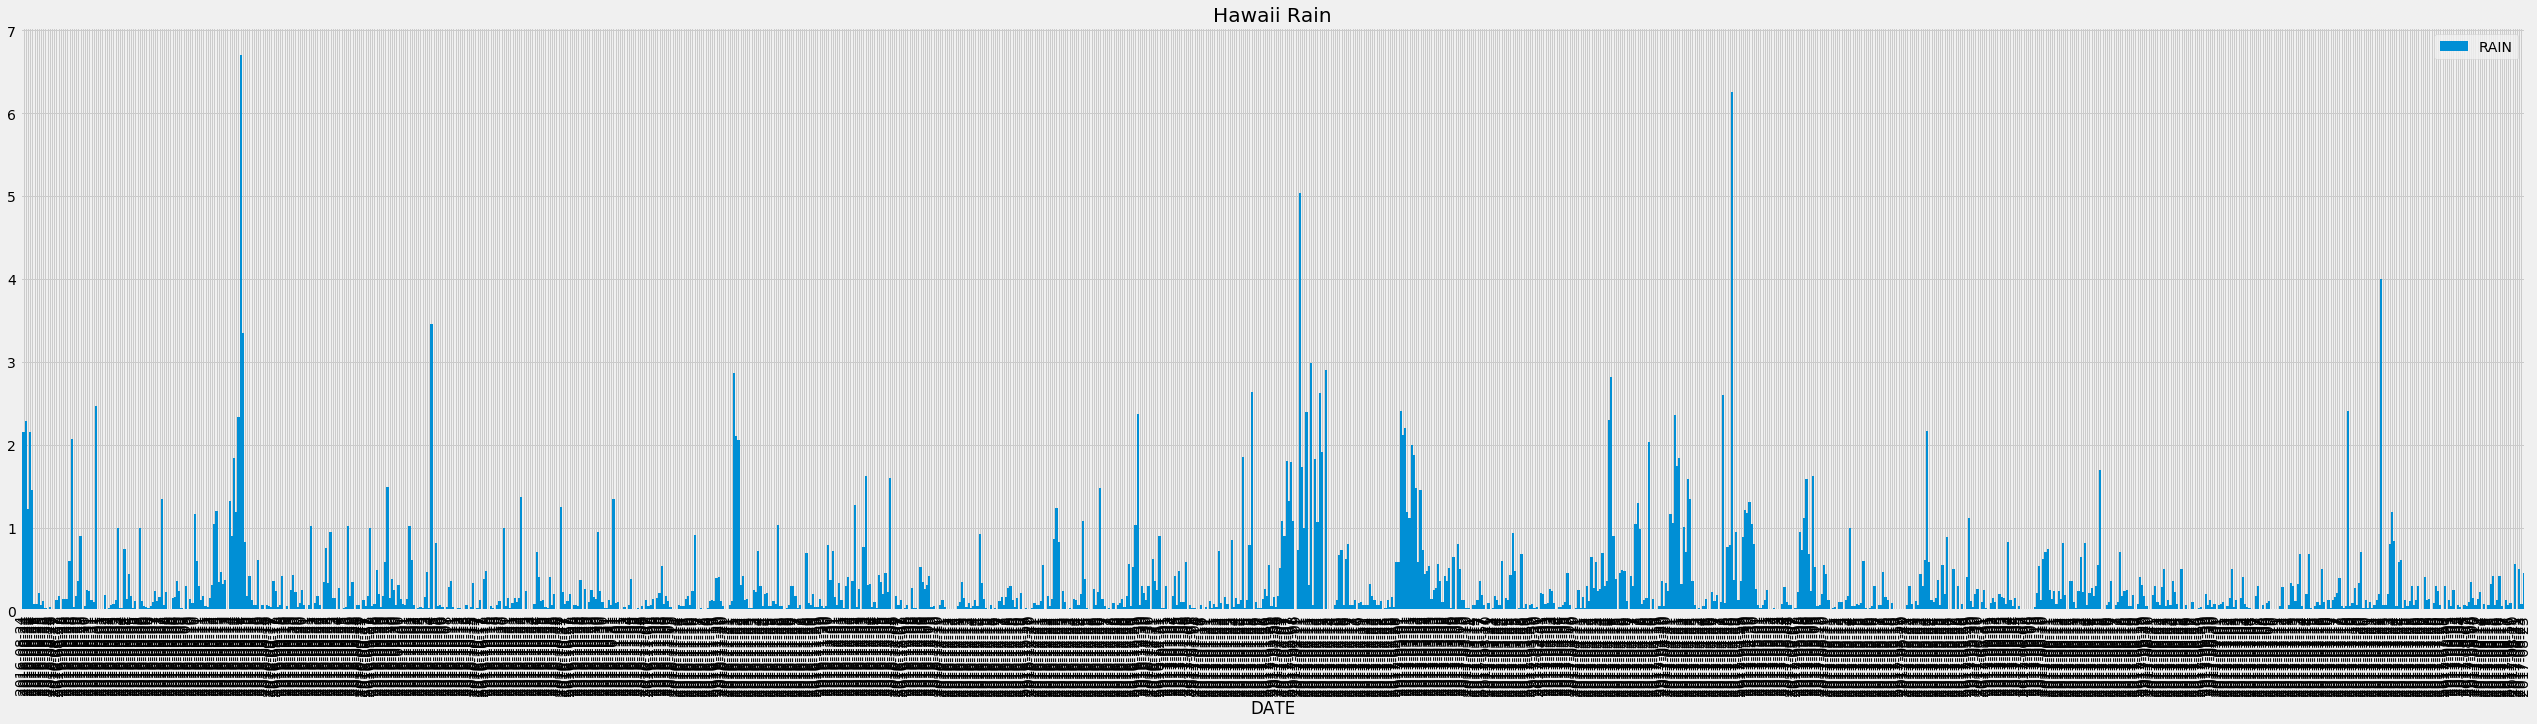

In [87]:
# Use Pandas Plotting with Matplotlib to plot the data
rain_data_df.plot(kind='bar', figsize=(40,10), title="Hawaii Rain", width= 1.0)
plt.xticks(rotation=90)

plt.savefig("Hawaii_Rain")

In [89]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = rain_data_df.describe()
summary_stats

,RAIN
count,1142.000000
mean,0.311357
std,0.576134
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [90]:
# Design a query to show how many stations are available in this dataset?
count_stations = session.query(func.count(func.distinct(Measurement.station))).all()
stations_count

[(9)]

In [91]:
# What are the most active stations? (i.e. what stations have the most rows)?
Active_Stations = func.count(Measurement.tobs).label("Count")
Stations = session.query(Measurement.station, func.count(Measurement.tobs).label("Count")).\
group_by(Measurement.station).order_by(Count.desc())

# List the stations and the counts in descending order.

for sl in Stations:
    print(f"Station:{sl[0]}\tCount:{sl[1]}")



Station:USC00519281	Count:2772
Station:USC00519397	Count:2724
Station:USC00513117	Count:2709
Station:USC00519523	Count:2669
Station:USC00516128	Count:2612
Station:USC00514830	Count:2202
Station:USC00511918	Count:1979
Station:USC00517948	Count:1372
Station:USC00518838	Count:511


In [94]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#USC00519281 is most active station

Temperatures = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281")
print(Temperatures[0])

(54.0, 85.0, 71.66378066378067)


In [69]:
# Choose the station with the highest number of temperature observations.

#highest temperature observations = USC00519281

Temperatures_Result= session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>last_date).\
                filter(Measurement.station == "USC00519281")

Temperatures_Result_df = pd.DataFrame(Temperatures_Result[:],columns=['Date','Temperature'])
Temperatures_Result_df.head()


,Date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


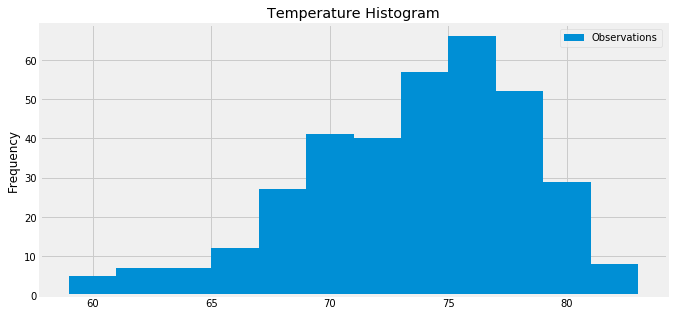

In [71]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.figure(figsize=(10,5))
plt.hist(Temperatures_Result_df["Temperature"], bins=12, label='Observations')
plt.ylabel("Frequency")
plt.title("Temperature Histogram")
plt.legend()
plt.savefig("Temp Histogram")
plt.show()

In [108]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(recent_date, last_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= recent_date).filter(Measurement.date <= last_date).all()

trip_temps('2017-06-25', '2017-07-09')

[(71.0, 77.84444444444445, 87.0)]

In [111]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacay_start= '2017-06-25'
vacay_end= '2017-07-09'

def calc_temps(recent_date, last_date):
    
    query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= recent_date).filter(Measurement.date <= last_date).all()
    
    for Tmin, Tmax, Tavg in query:
        print("From", recent_date, "to", last_date, "the lowest temperature is",
              Tmin,'\u00b0'"F, the highest temperature is", Tmax,'\u00b0'"F, and avg temep is",
              "{0:.1f}".format(round(Tavg,1)),'\u00b0'"F.")

trip_temps('2017-06-25', '2017-07-09')



From 2017-06-25 to 2017-07-09 the lowest temperature is 71.0 °F, the highest temperature is 87.0 °F, and avg temep is 77.8 °F.


In [113]:
#check to see that we're running with the right data 
start_date = '2017-06-28'
end_date = '2017-07-07'
vacay_query = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

vacay_temps = pd.DataFrame(vacay_query, columns=['Date', 'Tobs'])
vacay_temps.head()

,Date,Tobs
0,2017-06-28,79.0
1,2017-06-29,79.0
2,2017-06-30,75.0
3,2017-07-01,80.0
4,2017-07-02,80.0


In [114]:
vacay_temps.describe()

,Tobs
count,60.000000
mean,77.716667
std,2.511611
min,74.000000
25%,76.000000
50%,77.000000
75%,79.250000
max,87.000000


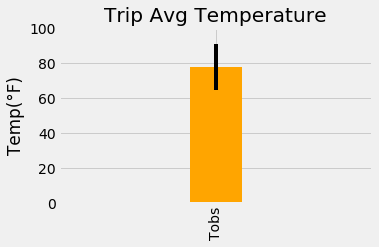

In [115]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avg_temp = vacay_temps.mean()
temp_diff = (vacay_temps["Tobs"].max()-vacay_temps["Tobs"].min())


p = avg_temp.plot(legend=False,kind="bar",color="orange",yerr=temp_diff, width=0.1, figsize=(5,3))
p.set_title("Trip Avg Temperature")
p.set_ylabel("Temp(°F)")
p.set_ylim(0,100)
plt.show()


In [118]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

Trip_Rain = func.avg(Measurement.prcp).label("Trip_Rain")
last_year_rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude,Station.elevation, \
                            func.avg(Measurement.prcp).label("Trip_Rain")).\
                filter(Measurement.station == Station.station).filter(Measurement.date >= '2017-06-28').\
                filter(Measurement.date <= '2017-07-07').group_by(Measurement.station).order_by(Trip_Rain.desc())


index = 0
for rf in last_year_rainfall:
    print(last_year_rainfall[index])
    index = index + 1


('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.158)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.065)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.04)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.037)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.015000000000000001)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0)
